Nama Kelompok:

Bimantara Dwi Cahyo (07)

Yusriyah Firjatullah (27)

Arya Bagus Putra Pratama (04)

Hanief Mohcsin (15)

Maulita Yasmin Nadila (18)


# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [10]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Load Data

In [11]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=50, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 12
Data dimension: (1560, 62, 47, 3)
Images flatten dimension: (1560, 8742)


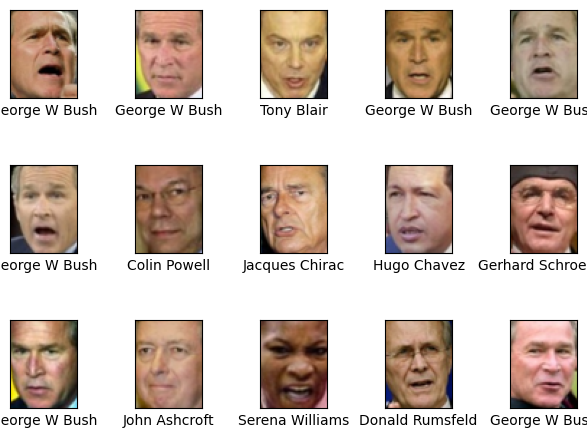

In [12]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [5]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

# Features Extraction

In [13]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

def extract_histogram(image, grid_size=(4, 4)):
    """
    Menghitung histogram dari gambar berdasarkan pembagian grid.
    """
    hist = []  # List untuk menyimpan histogram
    h, w, _ = image.shape  # Mendapatkan tinggi dan lebar gambar
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]  # Menghitung ukuran grid

    # Loop melalui setiap grid
    for row in range(grid_size[0]):
        for col in range(grid_size[1]):
            # Potong sub-gambar berdasarkan grid
            sub_image = image[row * grid_h:(row + 1) * grid_h, col * grid_w:(col + 1) * grid_w]
            # Loop untuk setiap channel RGB
            for i in range(3):
                # Hitung histogram untuk sub-gambar dan tambahkan ke list
                hist.append(np.histogram(sub_image[:, :, i], bins=256, range=(0, 1))[0])

    return np.array(hist).flatten()  # Kembalikan histogram sebagai array 1D


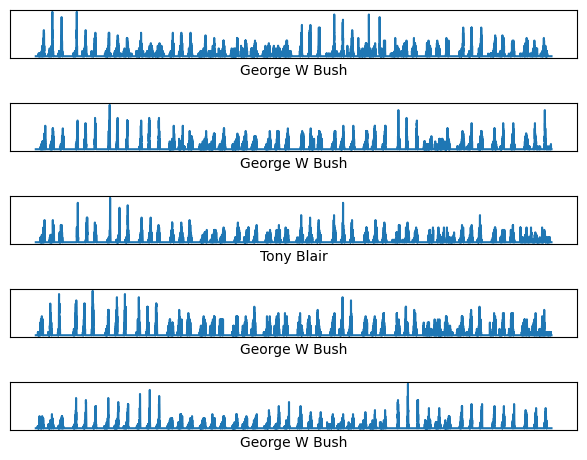

In [20]:
# Ekstraksi fitur histogram untuk semua gambar di dataset
X = np.array([extract_histogram(image) for image in faces.images])
y = faces.target  # Label target untuk klasifikasi

# Membuat subplots dengan 5 baris dan 1 kolom
fig, ax = plt.subplots(5, 1)
fig.tight_layout()  # Mengatur layout agar tidak ada overlap antar subplot

# Loop melalui setiap subplot
for i, axi in enumerate(ax.flat):
    axi.plot(X[rand_labels[i]])  # Plot data X berdasarkan label acak
    axi.set(xticks=[], yticks=[],  # Menghapus tick pada sumbu x dan y
            xlabel=faces.target_names[faces.target[rand_labels[i]]])  # Set label x berdasarkan nama target

# Build Model

In [21]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

# Import library yang diperlukan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  # Pastikan untuk mengimpor ini jika belum

# Pembagian data training dan testing dengan stratifikasi berdasarkan target
X_train, X_test, y_train, y_test = train_test_split(X, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

# Inisialisasi scaler untuk fitur dan target
X_scaler = StandardScaler()  # Scaler untuk fitur
y_scaler = StandardScaler()  # Scaler untuk target (jika diperlukan, meskipun tidak umum untuk y)

# Melakukan fit dan transformasi pada data training
X_train = X_scaler.fit_transform(X_train)
# Hanya melakukan transformasi pada data testing
X_test = X_scaler.transform(X_test)

# Inisialisasi model SVM dengan parameter tertentu
model = SVC(C=1, gamma=0.1, kernel="linear")
# Melatih model menggunakan data training
model.fit(X_train, y_train)


SVC(C=1, gamma=0.1, kernel='linear')

# Evaluation

Akurasi Model: 0.61
Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.38      0.50        16
     Colin Powell       0.50      0.64      0.56        47
  Donald Rumsfeld       0.70      0.29      0.41        24
    George W Bush       0.59      0.92      0.72       106
Gerhard Schroeder       0.50      0.27      0.35        22
      Hugo Chavez       0.33      0.07      0.12        14
   Jacques Chirac       0.00      0.00      0.00        10
    Jean Chretien       0.75      0.55      0.63        11
    John Ashcroft       0.00      0.00      0.00        11
Junichiro Koizumi       1.00      0.25      0.40        12
  Serena Williams       0.75      0.90      0.82        10
       Tony Blair       0.79      0.79      0.79        29

         accuracy                           0.61       312
        macro avg       0.56      0.42      0.44       312
     weighted avg       0.58      0.61      0.56       312



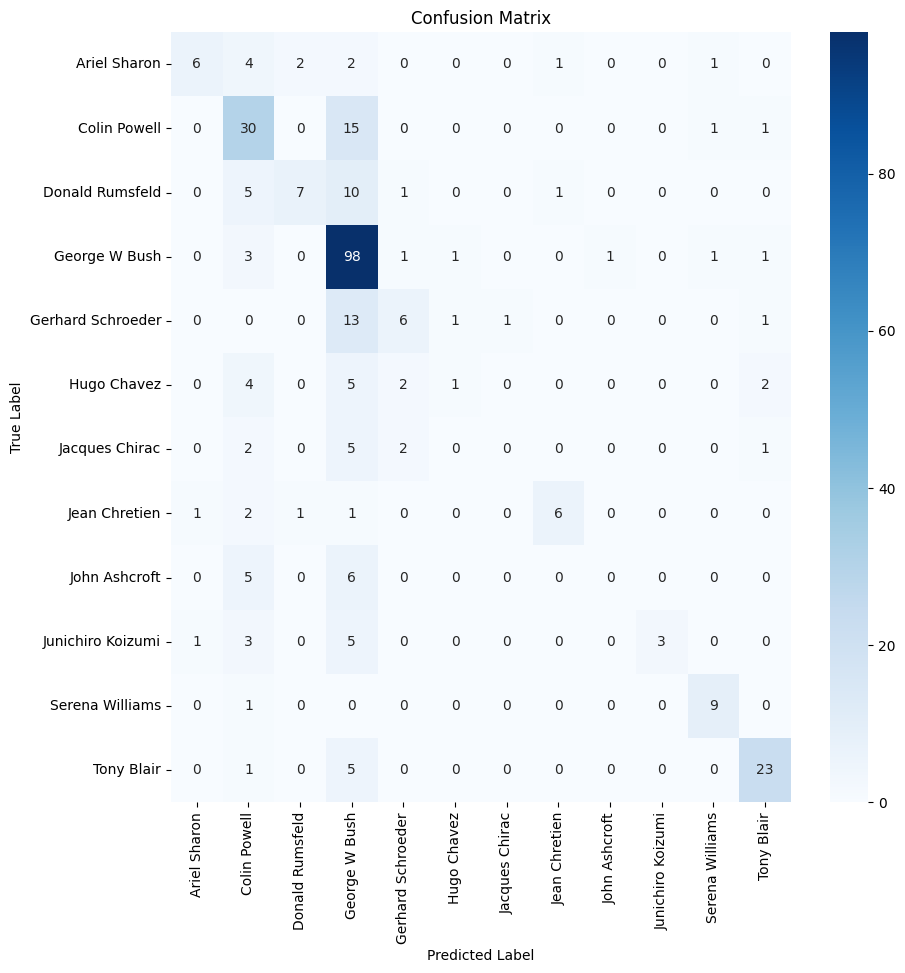

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''
# Prediksi data testing menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
print(f"Akurasi Model: {accuracy:.2f}")  # Menampilkan akurasi dengan format 2 desimal

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names))  # Menampilkan metrik klasifikasi

# Menghitung matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Memvisualisasikan matriks kebingungan
plt.figure(figsize=(10, 10))  # Mengatur ukuran figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # Menggambar heatmap untuk matriks kebingungan
             xticklabels=faces.target_names, yticklabels=faces.target_names)  # Menambahkan label
plt.xlabel('Predicted Label')  # Label untuk sumbu x
plt.ylabel('True Label')  # Label untuk sumbu y
plt.title('Confusion Matrix')  # Judul untuk plot
plt.show()  # Menampilkan plot


Challenge

In [47]:
def extract_lbp(image, grid_size=(4, 4)):
    # Inisialisasi list kosong untuk menyimpan fitur LBP dari seluruh grid.
    lbp = []

    # Mendapatkan tinggi (h) dan lebar (w) dari gambar serta jumlah kanal (biasanya RGB).
    h, w, _ = image.shape

    # Menghitung tinggi dan lebar dari setiap grid dengan membagi tinggi/lebar gambar dengan ukuran grid.
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]

    # Looping untuk membagi gambar menjadi grid berdasarkan grid_size.
    for row in range(grid_size[0]):
        for col in range(grid_size[1]):
            # Mengambil sub-image atau potongan gambar dari grid saat ini.
            sub_image = image[row*grid_h:(row+1)*grid_h, col*grid_w:(col+1)*grid_w]

            # Menerapkan LBP pada sub-image dan menambahkannya ke list lbp.
            lbp.extend(local_binary_patterns(sub_image, 8, 3))

    # Mengembalikan LBP dalam bentuk array numpy yang diflatten menjadi satu dimensi.
    return np.array(lbp).flatten()

def local_binary_patterns(image, num_points, radius):
    # Inisialisasi list kosong untuk menyimpan pola LBP untuk setiap piksel.
    lbp = []

    # Looping untuk setiap piksel di gambar (baris dan kolom).
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Mendapatkan nilai piksel pusat.
            center = image[i, j]

            # Inisialisasi list untuk menyimpan nilai-nilai piksel tetangga.
            neighbors = []

            # Looping untuk mendapatkan setiap tetangga dalam pola melingkar.
            for n in range(num_points):
                # Menghitung sudut untuk setiap tetangga (dalam radian).
                theta = 2 * np.pi * n / num_points

                # Menghitung posisi x dan y tetangga berdasarkan jari-jari dan sudut.
                x = int(i + radius * np.cos(theta))
                y = int(j + radius * np.sin(theta))

                # Memeriksa apakah tetangga berada di dalam batas gambar.
                if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
                    # Jika di luar batas, tambahkan 0 ke neighbors (nilai dummy).
                    neighbors.append(0)
                else:
                    # Jika dalam batas, tambahkan 1 jika tetangga lebih besar dari piksel pusat, jika tidak tambahkan 0.
                    neighbors.append(image[x, y] > center)

            # Mengonversi nilai neighbors menjadi bilangan biner dan menambahkannya ke list lbp.
            lbp.append(np.packbits(neighbors)[0])

    # Mengembalikan pola LBP untuk setiap piksel dalam gambar.
    return lbp


In [43]:
# Mengimpor class RandomForestClassifier dari modul sklearn.ensemble.
from sklearn.ensemble import RandomForestClassifier

# Membuat instance model RandomForestClassifier dengan 100 pohon keputusan (n_estimators=100) dan menetapkan random_state untuk konsistensi hasil.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model RandomForest menggunakan data pelatihan X_train (fitur) dan y_train (label).
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Akurasi Model: 0.43
Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.49      0.40      0.44        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.40      0.97      0.56       106
Gerhard Schroeder       0.00      0.00      0.00        22
      Hugo Chavez       0.00      0.00      0.00        14
   Jacques Chirac       0.00      0.00      0.00        10
    Jean Chretien       0.00      0.00      0.00        11
    John Ashcroft       0.00      0.00      0.00        11
Junichiro Koizumi       0.00      0.00      0.00        12
  Serena Williams       0.75      0.90      0.82        10
       Tony Blair       1.00      0.07      0.13        29

         accuracy                           0.43       312
        macro avg       0.22      0.20      0.16       312
     weighted avg       0.33      0.43      0.30       312



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


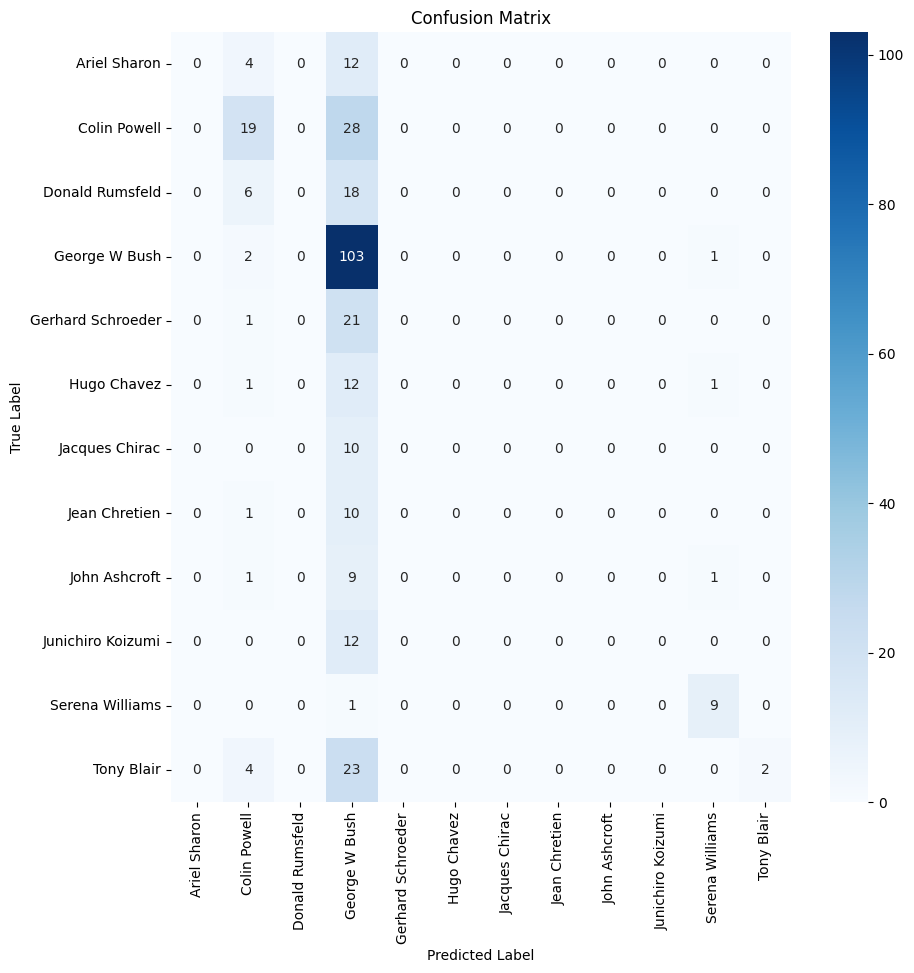

In [36]:
# Prediksi data testing menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
print(f"Akurasi Model: {accuracy:.2f}")  # Menampilkan akurasi dengan format 2 desimal

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names))  # Menampilkan metrik klasifikasi

# Menghitung matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Memvisualisasikan matriks kebingungan
plt.figure(figsize=(10, 10))  # Mengatur ukuran figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # Menggambar heatmap untuk matriks kebingungan
             xticklabels=faces.target_names, yticklabels=faces.target_names)  # Menambahkan label
plt.xlabel('Predicted Label')  # Label untuk sumbu x
plt.ylabel('True Label')  # Label untuk sumbu y
plt.title('Confusion Matrix')  # Judul untuk plot
plt.show()  # Menampilkan plot